<a href="https://colab.research.google.com/github/art-of-ai/simple-forecast/blob/main/Synthetic_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
from dateutil.relativedelta import relativedelta

In [2]:
# Создаем список месяцев и годов для выбора случайной даты
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
years = list(range(2010, 2023))  # Выбираем период с 2010 по 2022

# Создаем пустой DataFrame
data = {'Период': [], 'TNVED': [], 'product_type': []}

# Заполняем DataFrame
for _ in range(1000):  # Генерируем 1000 строк
    month = random.choice(months)
    year = random.choice(years)
    period = f'{month} {year}'
    tnved = random.randint(100, 1500)

    data['Период'].extend([period, period])
    data['TNVED'].extend([tnved, tnved])
    data['product_type'].extend(['Импортная', 'Отечественная'])

df = pd.DataFrame(data)

# Сохраняем DataFrame в CSV файл
df.to_csv('synthetic_dataset.csv', index=False)

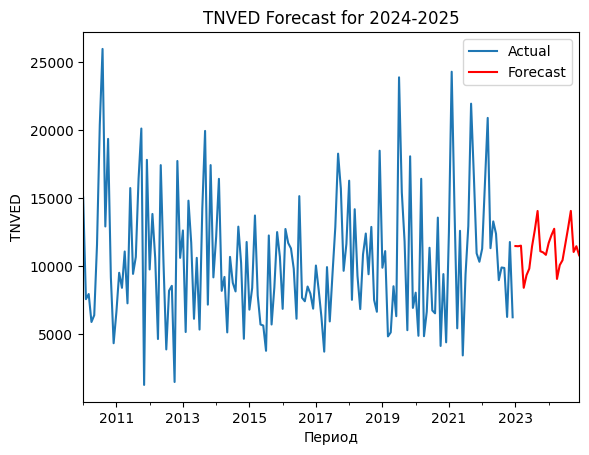

In [3]:
# Словарь для перевода названий месяцев с русского на английский
months_translation = {
    'Январь': '01',
    'Февраль': '02',
    'Март': '03',
    'Апрель': '04',
    'Май': '05',
    'Июнь': '06',
    'Июль': '07',
    'Август': '08',
    'Сентябрь': '09',
    'Октябрь': '10',
    'Ноябрь': '11',
    'Декабрь': '12',
}

# Функция для преобразования русскоязычной даты в datetime объект
def convert_ru_date_to_datetime(date_str):
    month_name, year = date_str.split(' ')
    month = months_translation[month_name]  # Получаем номер месяца
    date_str_formatted = f"{year}-{month}"  # Форматируем строку для конвертации
    return pd.to_datetime(date_str_formatted, format="%Y-%m")

# Загрузка исходного датасета
df = pd.read_csv("/content/synthetic_dataset.csv")

# Предполагаем, что у вас есть столбец 'Период', который вам нужно преобразовать
df['Период'] = df['Период'].apply(convert_ru_date_to_datetime)

# Убедимся, что df содержит только числовые столбцы для анализа
df_analyze = df[['Период', 'TNVED']].copy()

# Преобразование 'Период' в datetime, если еще не сделано
df_analyze['Период'] = pd.to_datetime(df_analyze['Период'])

# Группировка данных по 'Период' с суммированием данных 'TNVED'
monthly_totals = df_analyze.groupby(pd.Grouper(key='Период', freq='M'))['TNVED'].sum()

# Использование SARIMAX для моделирования данных с учетом сезонности
# В качестве примера принимаем сезонный период равным 12 месяцам
model = SARIMAX(monthly_totals, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Прогноз на следующие 24 месяца (2 года)
forecast = model_fit.forecast(steps=24)

# Визуализация результатов
monthly_totals.plot(label='Actual', legend=True)
forecast.plot(label='Forecast', legend=True, color='red')
plt.title('TNVED Forecast for 2024-2025')
plt.ylabel('TNVED')
plt.xlabel('Период')
plt.show()